In [22]:
import cv2
import numpy as np
import scipy as sp
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
#% matplotlib notebook
% matplotlib inline

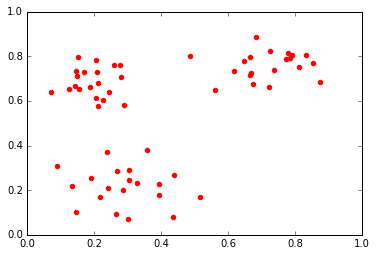

In [61]:
nclusters = 3
nsamples = 20
means = np.array([[0.3,0.2],[0.2,0.7],[0.75,0.75]])
stdevs = np.array([[[0.01,0.0],[0.0,0.01]],[[0.005,0.0],[0.0,0.005]],[[0.01,0.0],[0.0,0.01]]])
data = np.zeros((nclusters*nsamples,2))

for s in range(nclusters):
    data[s*nsamples:(s+1)*nsamples,:] = np.random.multivariate_normal(means[s,:],stdevs[s,:,:],nsamples)

plt.scatter(data[:,0],data[:,1],marker='o', color='r')
#np.savetxt('clusterdata.txt',data, delimiter=',')


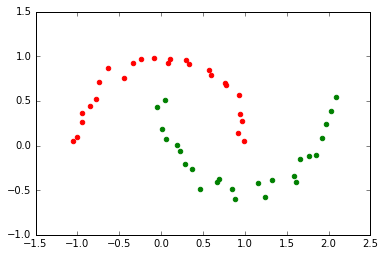

In [165]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=50, noise=0.05, random_state=0)
for s in range(2):
    plt.scatter(X[(y == s),0],X[(y == s),1],marker='o', color=color[s])
#np.savetxt('moonclusterdata.txt',X, delimiter=',')
#np.savetxt('moonclusterclasses.txt',y, delimiter=',')

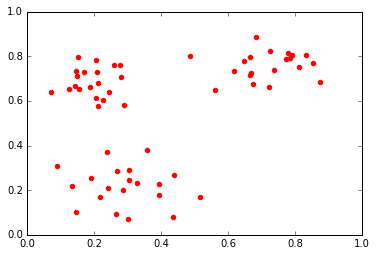

In [83]:
nclusters = 3
nsamples = 20
npoints = nclusters*nsamples
data = np.zeros((npoints,2))
data = np.loadtxt('clusterdata.txt', delimiter=',')
plt.scatter(data[:,0],data[:,1],marker='o', color='r')

In [98]:
centres = data[np.random.randint(0,npoints,nclusters),:]
print(centres)

[[ 0.77991168  0.81400704]
 [ 0.39306601  0.22573557]
 [ 0.26493166  0.0952824 ]]


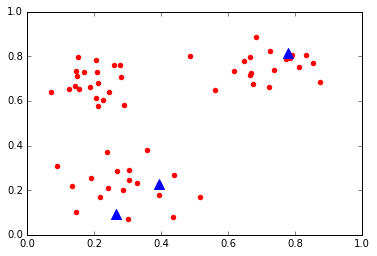

In [100]:
plt.scatter(data[:,0],data[:,1],marker='o', color='r')
plt.scatter(centres[:,0],centres[:,1],marker='^', color='b', s=100)

In [101]:
def classify(data,clusterid,nclusters):
    for i in range(np.size(data,0)):
        mind = 9999.0
        for s in range(nclusters):
            d = np.linalg.norm(data[i,:]-centres[s,:])
            if d < mind:
                mind = d
                clusterid[i] = s
    return


clusters = np.zeros(npoints, dtype=int)
classify(data,clusters,3)

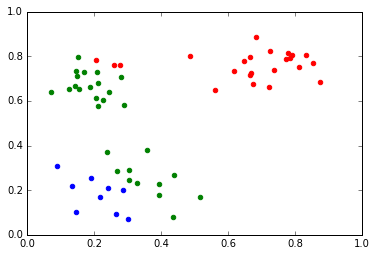

In [112]:
color = ['r','g','b']
for s in range(nclusters):
    plt.scatter(data[(clusters == s),0],data[(clusters == s),1],marker='o', color=color[s])


In [118]:
def getcentres(data,clusterid,nclusters):
    centres = np.zeros((nclusters,2))
    count = np.zeros(nclusters, dtype=int)
    for i in range(np.size(data,0)):
        count[clusterid[i]] = count[clusterid[i]] + 1
        centres[clusterid[i]] = centres[clusterid[i]] + data[i,:]
    centres[:,0] = centres[:,0]/count[:]
    centres[:,1] = centres[:,1]/count[:]
    return(centres)

centres = getcentres(data,clusters,nclusters)

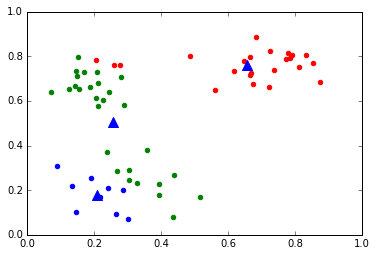

In [119]:
for s in range(nclusters):
    plt.scatter(data[(clusters == s),0],data[(clusters == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='b', s=100)

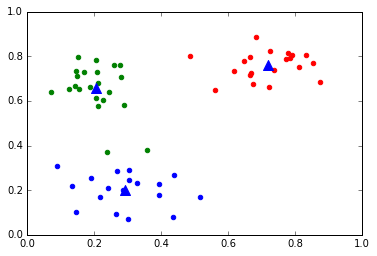

In [120]:
classify(data,clusters,nclusters)
centres = getcentres(data,clusters,nclusters)
for s in range(nclusters):
    plt.scatter(data[(clusters == s),0],data[(clusters == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='b', s=100)

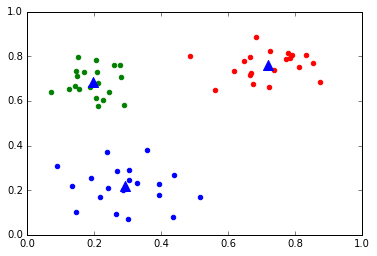

In [121]:
classify(data,clusters,nclusters)
centres = getcentres(data,clusters,nclusters)
for s in range(nclusters):
    plt.scatter(data[(clusters == s),0],data[(clusters == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='b', s=100)

In [125]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = nclusters)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.71811227  0.75944573]
 [ 0.19559659  0.68367229]
 [ 0.2924317   0.21784796]]


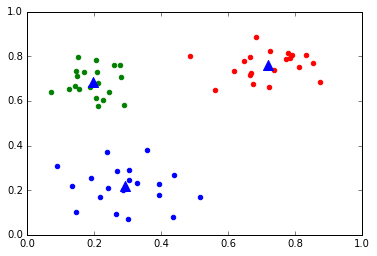

In [131]:
for s in range(nclusters):
    plt.scatter(data[(kmeans.labels_ == s),0],data[(kmeans.labels_ == s),1],marker='o', color=color[s])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='b', s=100)

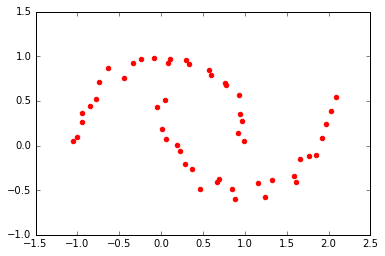

In [151]:
nclusters = 2
nsamples = 25
npoints = nclusters*nsamples
data = np.zeros((npoints,2))
data = np.loadtxt('moonclusterdata.txt', delimiter=',')
plt.scatter(data[:,0],data[:,1],marker='o', color='r')

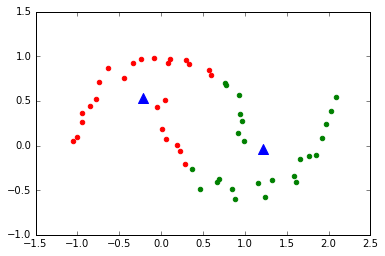

In [164]:
clusters = np.zeros(npoints, dtype=int)
ncycles = 100
centres = data[np.random.randint(0,npoints,nclusters),:]
for t in range(ncycles):
    classify(data,clusters,nclusters)
    centres = getcentres(data,clusters,nclusters)
for s in range(nclusters):
    plt.scatter(data[(clusters == s),0],data[(clusters == s),1],marker='o', color=color[s])
plt.scatter(centres[:,0],centres[:,1],marker='^', color='b', s=100)